In [1]:
# Import the necessary libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.utils import shuffle

In [2]:
# Read the CSV file
data = pd.read_csv('Assignment DataSet.csv', index_col=0)

# Unkown values in the dataset are denoted by '?', so we replace them with NaN
data.replace('?', np.nan, inplace=True)

# Data Understanding & Preparation

The data is a subset of the data from "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records". In the paper, table 1, they define each feature-column. 

In [3]:
data.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
0,41186889,Caucasian,Female,[80-90),1,6,7,13,69,4,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
1,83591073,Caucasian,Female,[80-90),6,1,17,5,34,0,...,No,No,Steady,No,No,No,No,No,No,NO
2,68337009,Other,Male,[60-70),1,2,1,1,37,1,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
3,73175076,Caucasian,Male,[40-50),1,1,7,4,56,2,...,No,No,Steady,Up,No,No,No,Ch,Yes,YES
4,31718349,Caucasian,Female,[70-80),1,1,7,1,38,2,...,No,No,Steady,No,No,No,No,No,No,NO


Before anything, let us decode the categorical encoded data to enhance our understanding and preparation of the data. The features are the ID's and the diagnosis codes. 

The IDs mappings are given in the original database. 

In [4]:
# ID_mappings
data['admission_type_id'] = data['admission_type_id'].replace(
    {
        1: "urgency",  # Emergency     → Urgency
        2: "urgency",  # Urgent        → Urgency
        3: "elective", # Elective      → Elective
        4: "newborn",  # Newborn       → Newborn
        5: np.nan,  # Not Mapped    → Unknown
        6: np.nan,  # NULL          → Unknown
        7: "urgency",  # Trauma Center → Urgency
        8: np.nan,  # Not mapped    → Unknown
    }
)

data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(
    {
        1: "home", 
        2: "hospital", 
        3: "hospital", 
        4: "hospital",  
        5: "hospital", 
        6: "home", 
        7: "hospital",  
        8: "home",  
        9: "hospital",
        10: "hospital",
        11: "expired",
        13: "hospice",
        14: "hospice",
        15: "hospital",
        16: "hospital",
        17: "hospital",
        18: np.nan,
        22: "hospital",
        23: "hospital",
        24: "hospital",
        25: np.nan,
        26: np.nan,
        30: "hospital",
        27: "hospital",
        28: "hospital",
    }
)

data['admission_source_id'] = data['admission_source_id'].replace(
    {
        1: "healthcare", 
        2: "healthcare", 
        3: "healthcare", 
        4: "healthcare", 
        5: "healthcare",
        6: "healthcare",
        7: "emergency",
        9: np.nan,
        11: "healthcare",
        17: np.nan,
        20: np.nan 
    }
)

Regarding the diagnosis mappings, we consider the ones defined in table 2 of the paper.

In [5]:
# Diagnosis mappings 
diags = ['diag_1', 'diag_2', 'diag_3']
for diag in diags: 
    data[diag] = np.where(data[diag].between(390, 459), 1, data[diag]) # circulatory
    data[diag] = np.where(data[diag].between(785, 785), 1, data[diag]) # circulatory

    data[diag] = np.where(data[diag].between(520, 579), 2, data[diag]) # digestive
    data[diag] = np.where(data[diag].between(787, 787), 2, data[diag]) # digestive

    data[diag] = np.where(data[diag].between(580, 629), 3, data[diag]) # genitourinary
    data[diag] = np.where(data[diag].between(788, 788), 3, data[diag]) # genitourinary

    data[diag] = np.where(data[diag].between(250, 251), 4, data[diag]) # diabetes
    data[diag] = np.where(data[diag].between(800, 999), 5, data[diag]) # injury
    data[diag] = np.where(data[diag].between(710, 739), 6, data[diag]) # musculoskeletal
    data[diag] = np.where(data[diag].between(140, 239), 7, data[diag]) # neoplasms

    data[diag] = np.where(data[diag].between(460, 519), 8, data[diag]) # respiratory
    data[diag] = np.where(data[diag].between(786, 786), 8, data[diag]) # respiratory

    data[diag] = np.where(data[diag].between(10, 10000), 9, data[diag]) # other
    
    data[diag] = data[diag].replace(
    {
        1: "circulatory", 
        2: "digestive", 
        3: "genitourinary", 
        4: "diabetes", 
        5: "injury",
        6: "musculoskeletal",
        7: "neoplasms",
        8: "respiratory",
        9: "other",
    }
)

In [6]:
data.info() # Shape, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_nbr               5000 non-null   int64  
 1   race                      4888 non-null   object 
 2   gender                    5000 non-null   object 
 3   age                       5000 non-null   object 
 4   admission_type_id         4485 non-null   object 
 5   discharge_disposition_id  4769 non-null   object 
 6   admission_source_id       4684 non-null   object 
 7   time_in_hospital          5000 non-null   int64  
 8   num_lab_procedures        5000 non-null   int64  
 9   num_procedures            5000 non-null   int64  
 10  num_medications           5000 non-null   int64  
 11  number_outpatient         5000 non-null   int64  
 12  number_emergency          5000 non-null   int64  
 13  number_inpatient          5000 non-null   int64  
 14  diag_1       

We observe that the data has shape (5000, 37). The data types are the expected. The only data with missing values are:
- race: 112 
- admission_type_id: 515
- discharge_disposition_id: 231
- admission_source_id: 316
- tolbutamide: 3993

Let us now explore some general statistics of the data. 
Remark: Notice that the mean might not be descriptive for some data. Latter we explore the data distribution in more detail.

In [7]:
data_numeric_with_meaning = data.drop(['patient_nbr'], axis=1)
# data_numeric_with_meaning = data.drop(['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1)
data_numeric_with_meaning.describe() # Summary statistics for numerical columns excluding IDs

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_4,number_diagnoses
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4.430400,43.195200,1.360400,15.904600,0.417600,0.187200,0.638000,439.815457,7.395000
std,3.009612,19.761316,1.711227,8.117406,1.476227,0.755957,1.244374,213.940968,1.925647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.151678,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,287.300363,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,409.086176,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,552.748089,9.000000
max,14.000000,108.000000,6.000000,65.000000,39.000000,22.000000,15.000000,1509.286492,16.000000


In [8]:
data.describe(include= object) # Summary statistics for categorical columns

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,chlorpropamide,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
count,4888,5000,5000,4485,4769,4684,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5,2,10,2,4,2,9,9,9,3,...,2,1,2,4,4,2,1,2,2,2
top,Caucasian,Female,[70-80),urgency,home,emergency,circulatory,circulatory,circulatory,No,...,No,No,Steady,No,No,No,No,No,Yes,NO
freq,3759,2701,1241,3553,3624,2871,1524,1618,1498,4997,...,4999,5000,3457,2329,4967,4999,5000,2692,3860,2718


Remarks:
- race: Caucasian dominates the data set with 3759 entries. 
- chlorpropamide: Has 3 values but 4997 are "No". This feature is almost redundant. 
- glimepiride: Has 4 values but 4738 are "No". This feature is almost redundant.
- acetohexamide: Has only "No" values. This feature is redundant.
- glyburide: Has 4 values but 4454 are "No". This feature is almost redundant.
- tolbutamide: Has 1 value and 3993 missing values. This feature is redundant.
- pioglitazone: Has 4 values but 4653 are "No". This feature is almost redundant.
- rosiglitazone: Has 4 values but 4679 are "No". This feature is almost redundant.
- troglitazone: Has only "No" values. This feature is redundant.
- tolazamide: Has 2 values but 4999 are "No". This feature is almost redundant.
- examide: Has only "No" values. This feature is redundant.
- citoglipton: Has 2 values. We cannot neglect this feature in principle.
- glyburide-metformin: Has 4 values but 4967 are "No". This feature is almost redundant.
- glipizide-metformin: Has 2 values but 4999 are "No". This feature is almost redundant.
- metformin-rosiglitazone: Has only "No" values. This feature is redundant.

Conclusions: 
- We can remove the following features: acetohexamide, tolbutamide, troglitazone, examide and metformin-rosiglitazone.
- We can almost remove the following features: chlorpropamide, tolazamide and glipizide-metformin. 
- We maybe could also remove: glimepiride, glyburide, pioglitazone, rosiglitazone, tolazamide, glyburide-metformin, and glipizide-metformin.

Thus we hypothesize that these features will not be very useful in the model.

In [9]:
# Remove redundant columns
redundant_columns = ["acetohexamide", "tolbutamide", "troglitazone", "examide", "metformin-rosiglitazone"]
data.drop(redundant_columns, axis=1, inplace=True) # Drop the redundant columns

# almost_reduntant_columns = ["chlorpropamide", "tolazamide", "glipizide-metformin"]

# maybe_reduntant_columns = [ "glimepiride", "glyburide", "pioglitazone", "rosiglitazone", "tolazamide", "glyburide-metformin", "glipizide-metformin"]

patient_nbr
38617533    3
85259655    3
96412860    3
23481783    3
25616556    3
           ..
88635951    1
40723704    1
23531346    1
2612187     1
41306418    1
Name: count, Length: 4837, dtype: int64
race
Caucasian          3759
AfricanAmerican     923
NaN                 112
Hispanic             95
Other                72
Asian                39
Name: count, dtype: int64


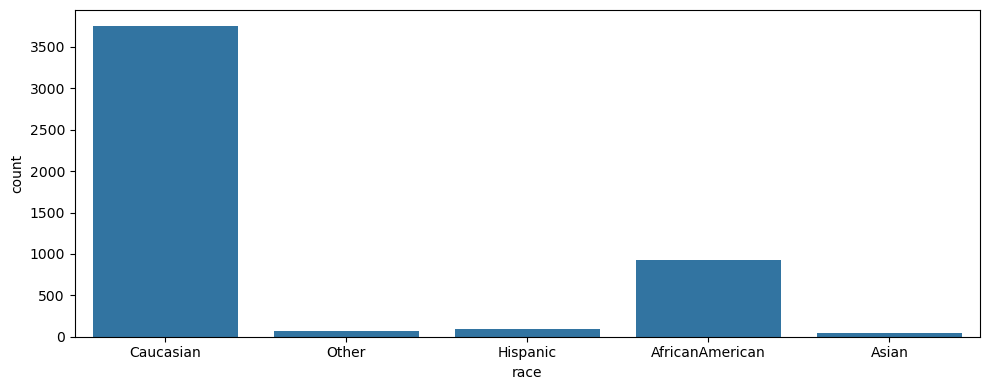

gender
Female    2701
Male      2299
Name: count, dtype: int64


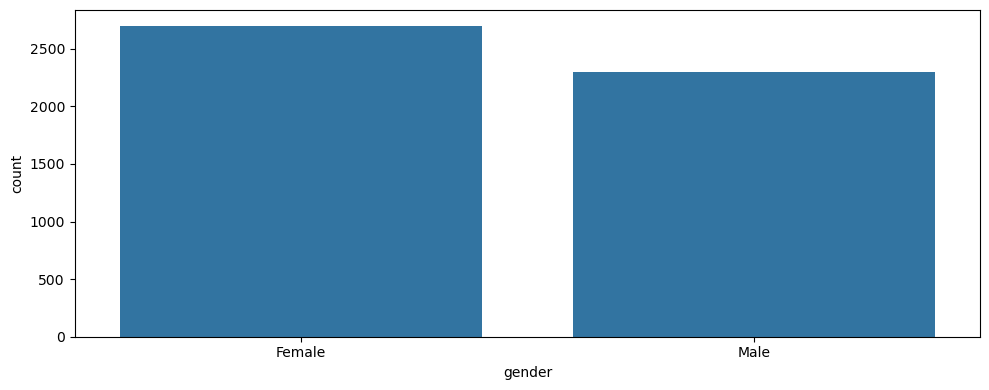

age
[70-80)     1241
[60-70)     1168
[80-90)      844
[50-60)      832
[40-50)      462
[30-40)      183
[90-100)     138
[20-30)       85
[10-20)       39
[0-10)         8
Name: count, dtype: int64


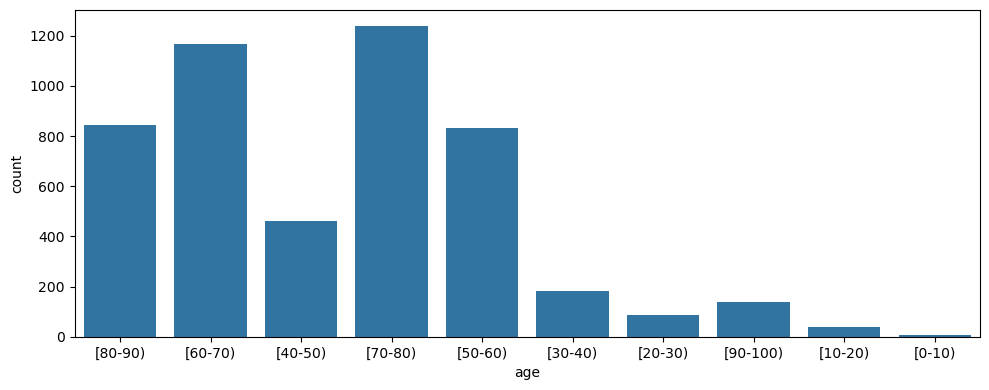

admission_type_id
urgency     3553
elective     932
NaN          515
Name: count, dtype: int64


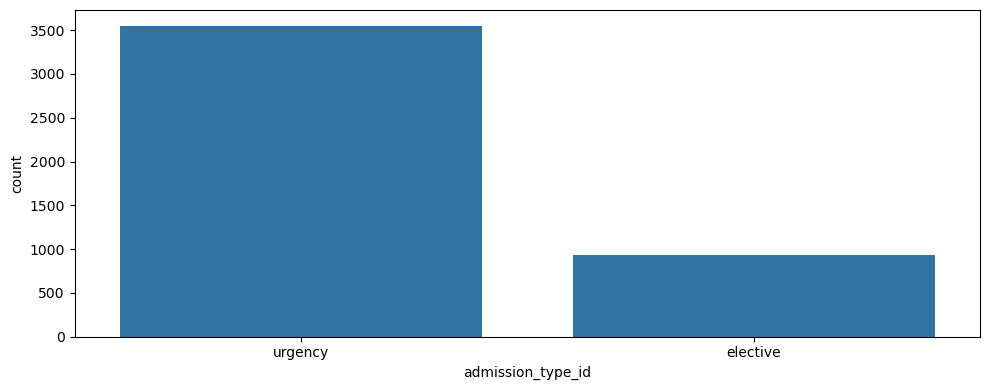

discharge_disposition_id
home        3624
hospital    1017
NaN          231
expired       81
hospice       47
Name: count, dtype: int64


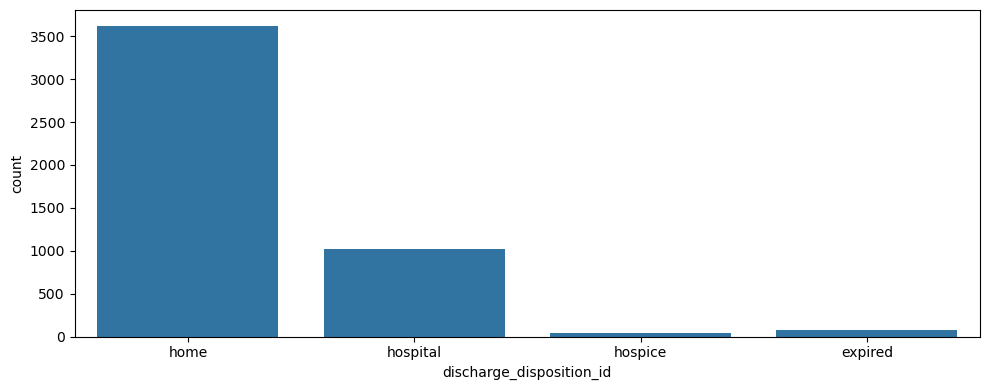

admission_source_id
emergency     2871
healthcare    1813
NaN            316
Name: count, dtype: int64


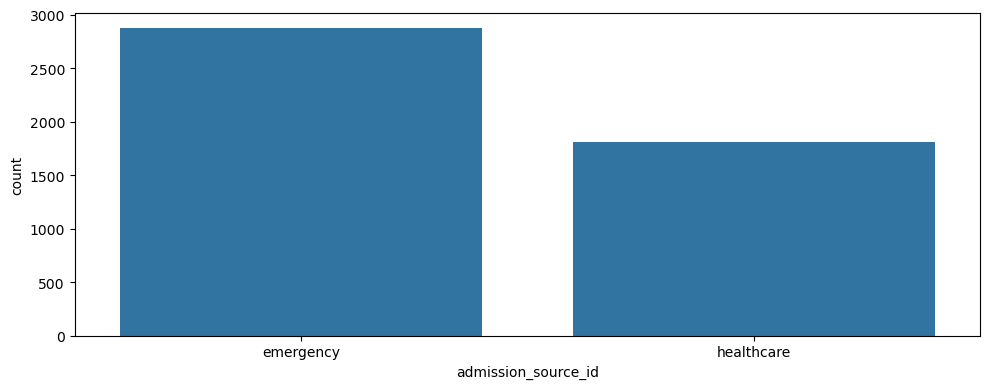

time_in_hospital
3     861
2     857
4     686
1     683
5     485
6     366
7     281
8     218
9     164
10    123
11     91
12     68
13     65
14     52
Name: count, dtype: int64


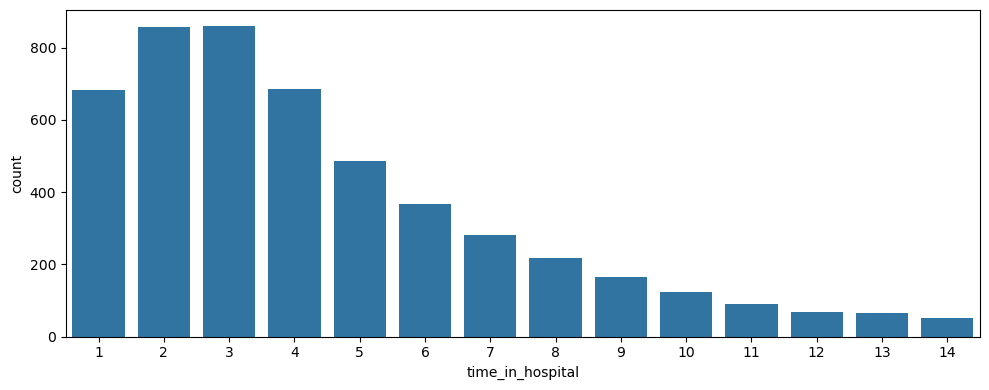

num_lab_procedures
1      179
43     135
44     127
46     121
40     116
      ... 
96       1
98       1
108      1
100      1
94       1
Name: count, Length: 99, dtype: int64


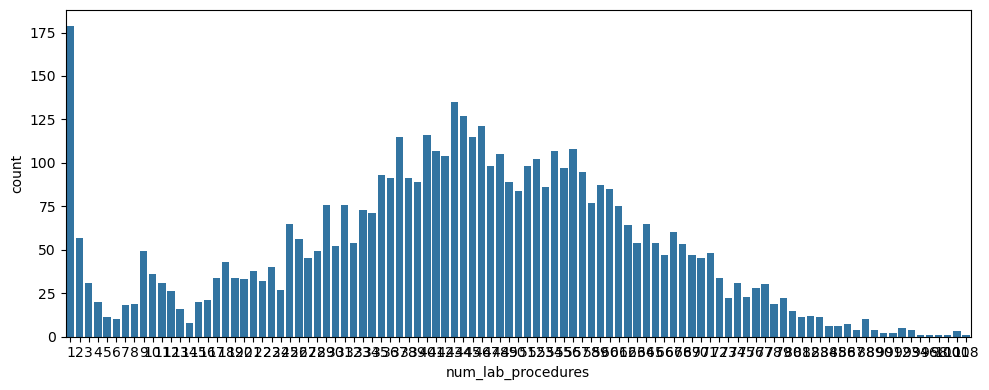

num_procedures
0    2253
1    1027
2     639
3     471
6     257
4     223
5     130
Name: count, dtype: int64


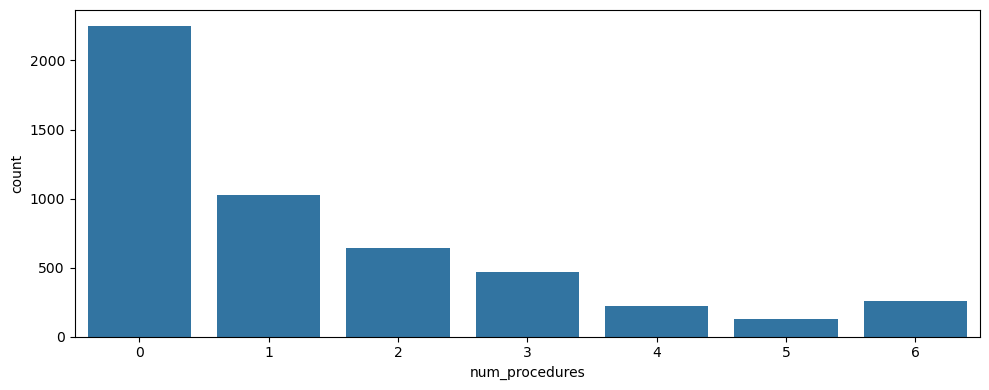

num_medications
15    299
12    292
13    290
14    275
16    275
     ... 
48      2
60      2
54      1
55      1
63      1
Name: count, Length: 62, dtype: int64


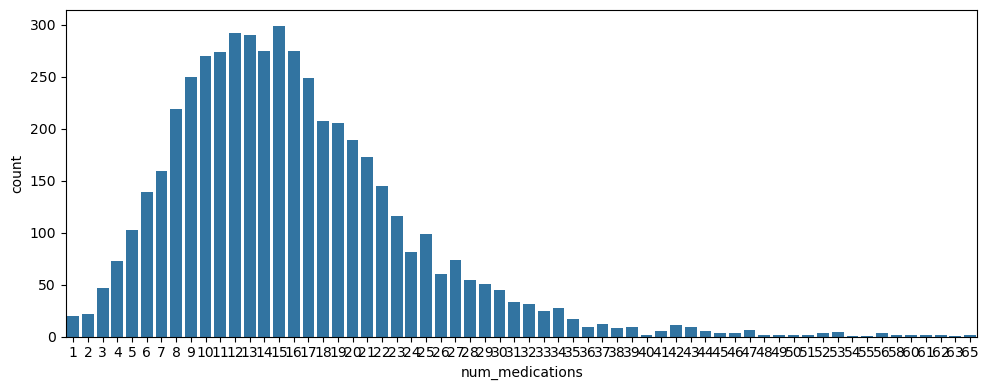

number_outpatient
0     4107
1      463
2      189
3       98
4       66
5       21
6       14
7        9
8        7
11       4
9        4
13       3
10       3
12       2
14       2
21       2
22       1
16       1
20       1
23       1
18       1
39       1
Name: count, dtype: int64


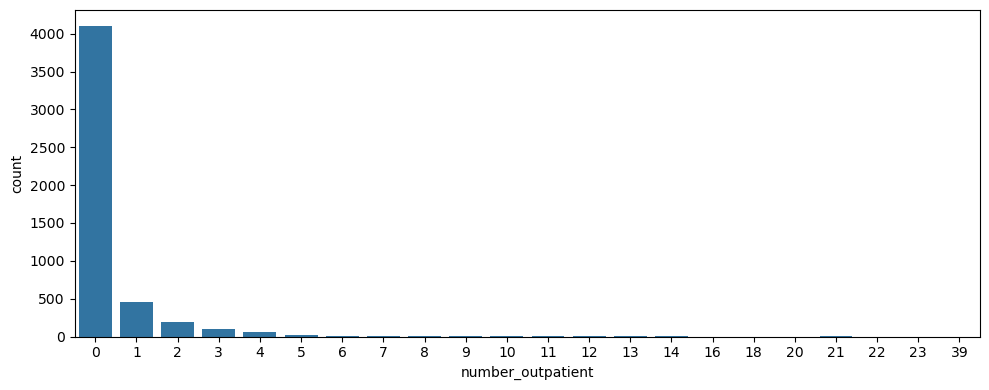

number_emergency
0     4425
1      399
2      102
3       38
4       15
5        9
6        6
22       1
10       1
8        1
12       1
19       1
7        1
Name: count, dtype: int64


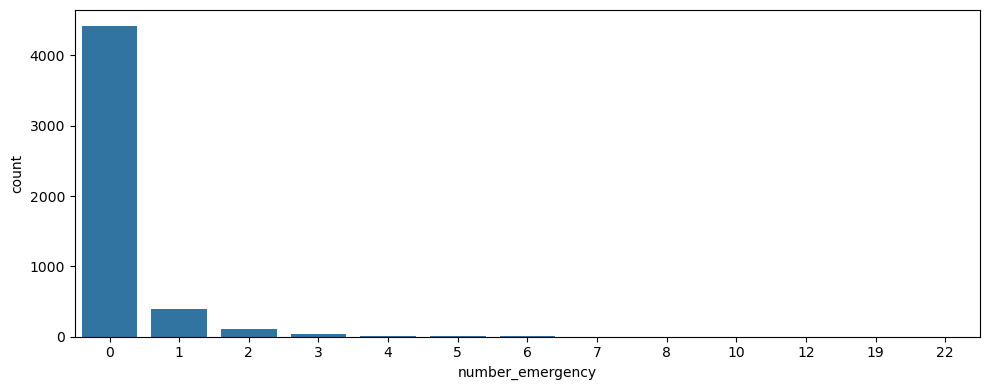

number_inpatient
0     3281
1     1015
2      358
3      169
4       83
5       38
6       18
7       18
8        7
9        4
11       3
10       3
12       1
14       1
15       1
Name: count, dtype: int64


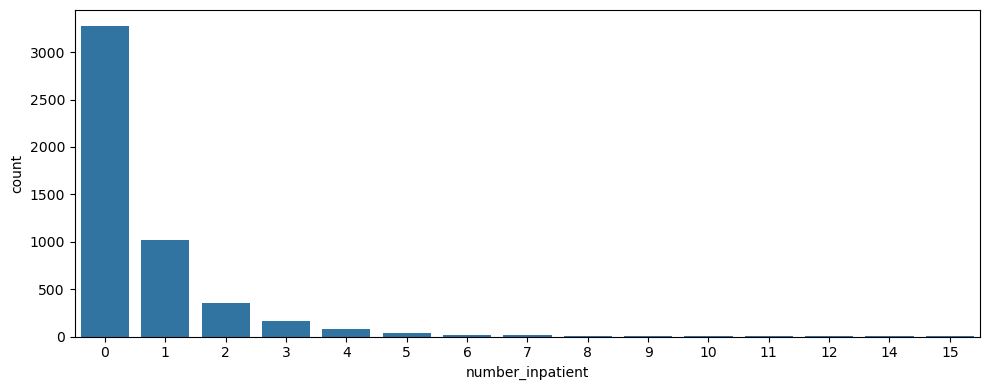

diag_1
circulatory        1524
other               890
respiratory         714
digestive           468
diabetes            436
injury              326
genitourinary       254
musculoskeletal     225
neoplasms           163
Name: count, dtype: int64


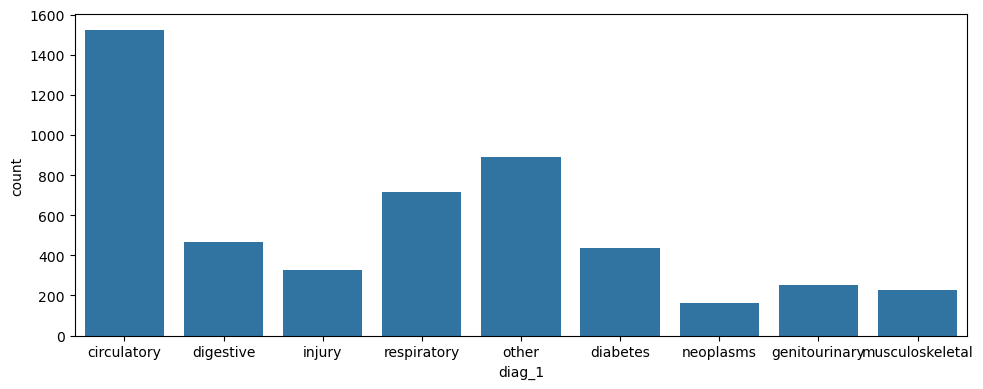

diag_2
circulatory        1618
other              1264
diabetes            586
respiratory         526
genitourinary       429
digestive           205
injury              162
neoplasms           130
musculoskeletal      80
Name: count, dtype: int64


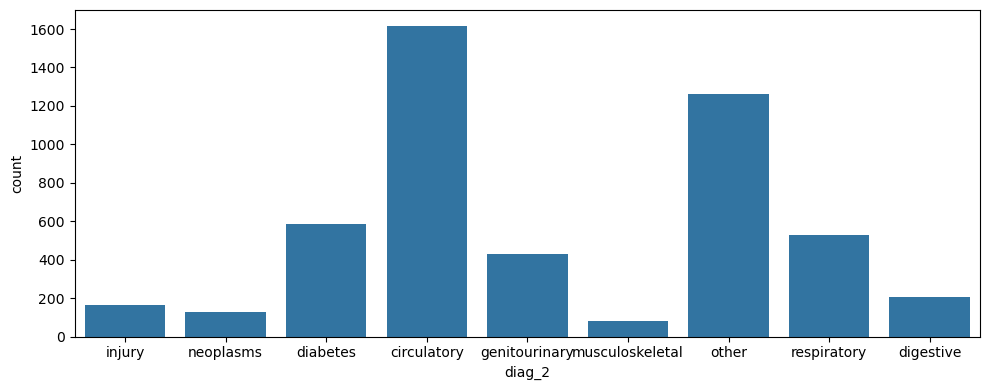

diag_3
circulatory        1498
other              1383
diabetes            855
respiratory         373
genitourinary       363
digestive           178
injury              170
musculoskeletal     105
neoplasms            75
Name: count, dtype: int64


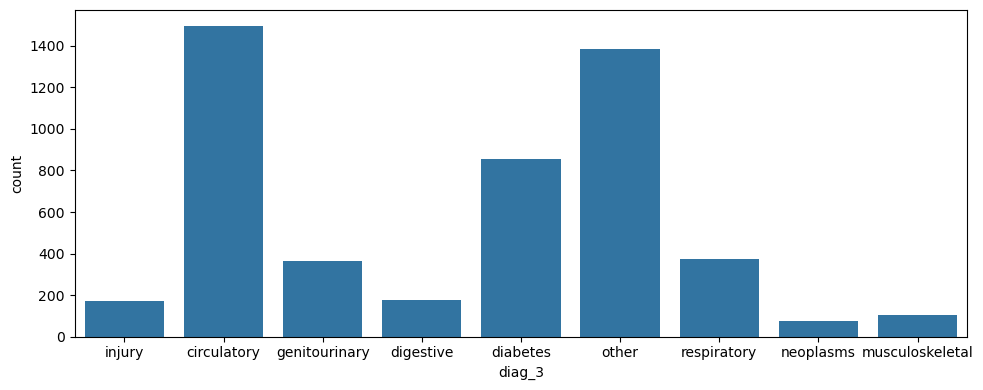

diag_4
764.938726     1
368.200822     1
770.971472     1
391.663767     1
1058.989939    1
              ..
413.969776     1
451.792710     1
559.080677     1
705.039513     1
716.437553     1
Name: count, Length: 5000, dtype: int64
number_diagnoses
9     2398
5      591
7      536
6      525
8      485
4      261
3      147
2       47
1        5
16       3
11       1
13       1
Name: count, dtype: int64


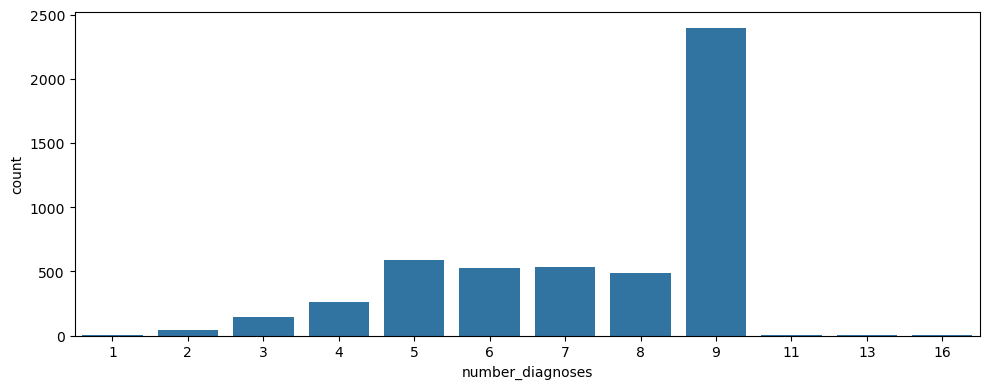

chlorpropamide
No        4997
Steady       2
Up           1
Name: count, dtype: int64


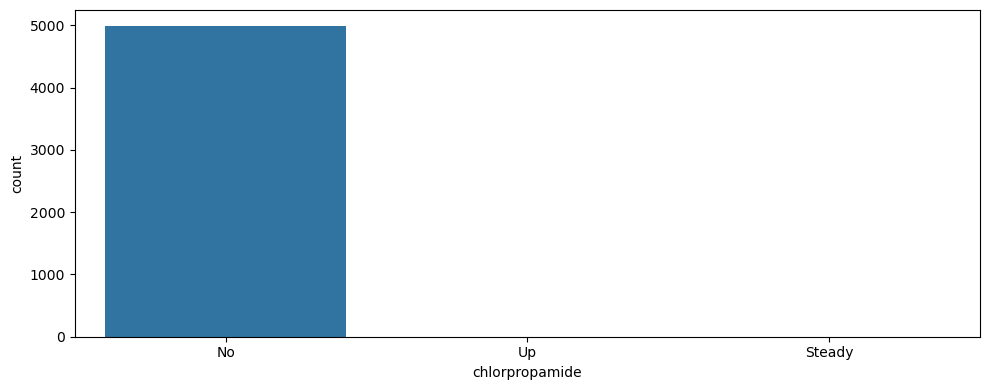

glimepiride
No        4738
Steady     227
Up          20
Down        15
Name: count, dtype: int64


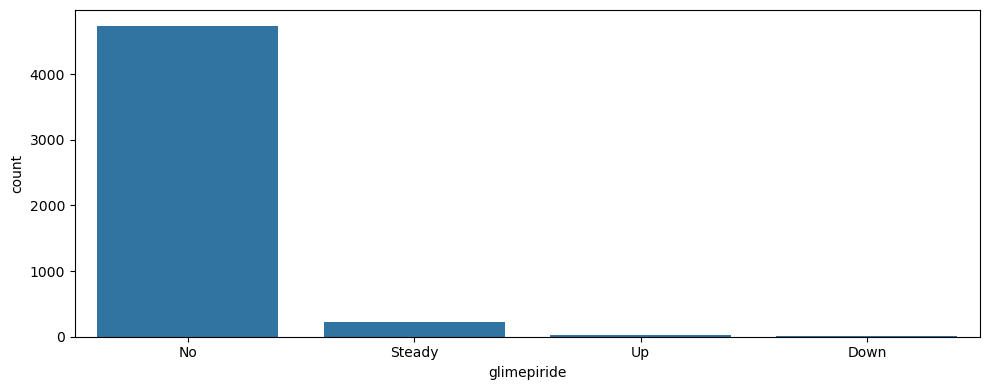

glyburide
No        4454
Steady     486
Up          35
Down        25
Name: count, dtype: int64


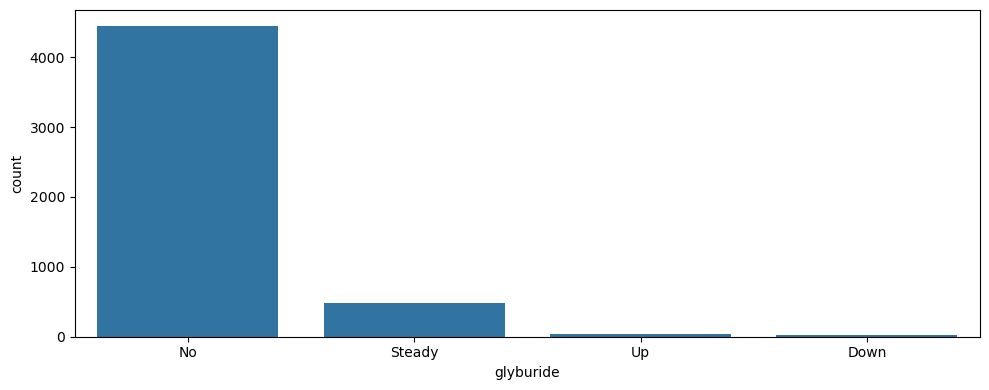

pioglitazone
No        4653
Steady     331
Up          12
Down         4
Name: count, dtype: int64


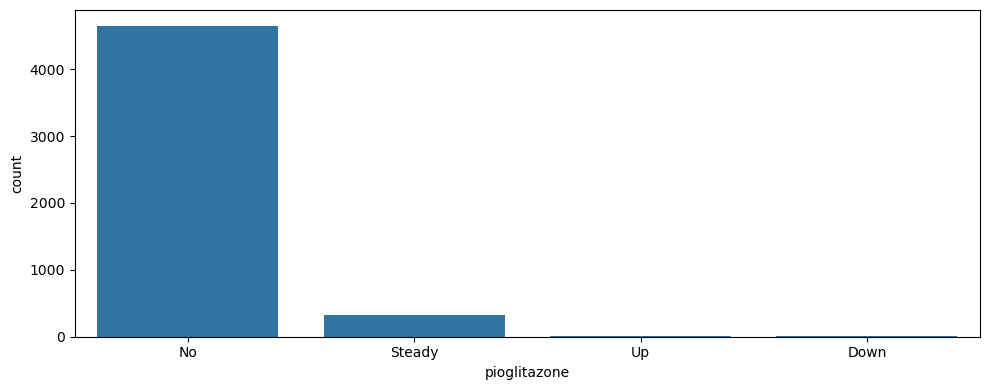

rosiglitazone
No        4679
Steady     305
Up          11
Down         5
Name: count, dtype: int64


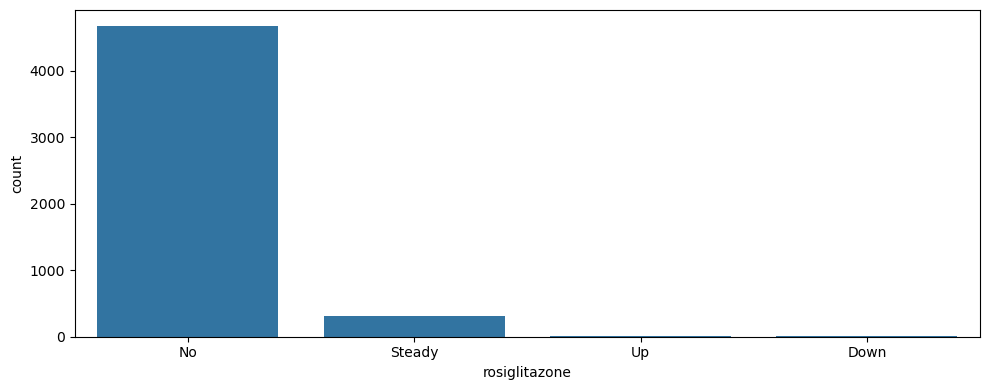

tolazamide
No        4999
Steady       1
Name: count, dtype: int64


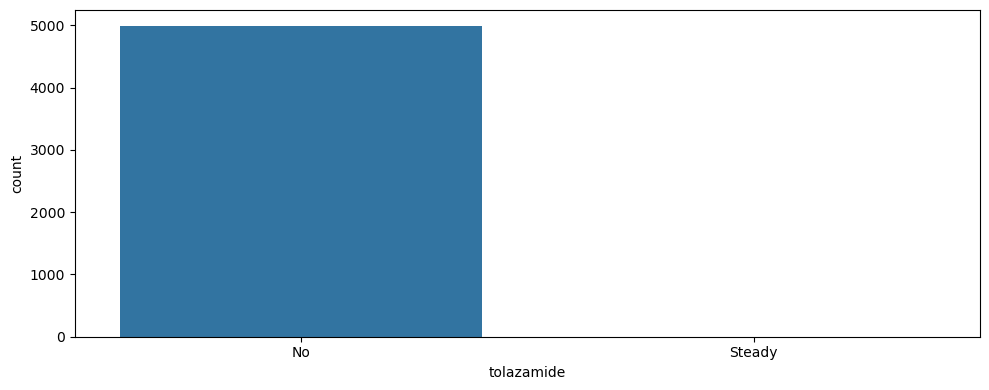

citoglipton
Steady    3457
No        1543
Name: count, dtype: int64


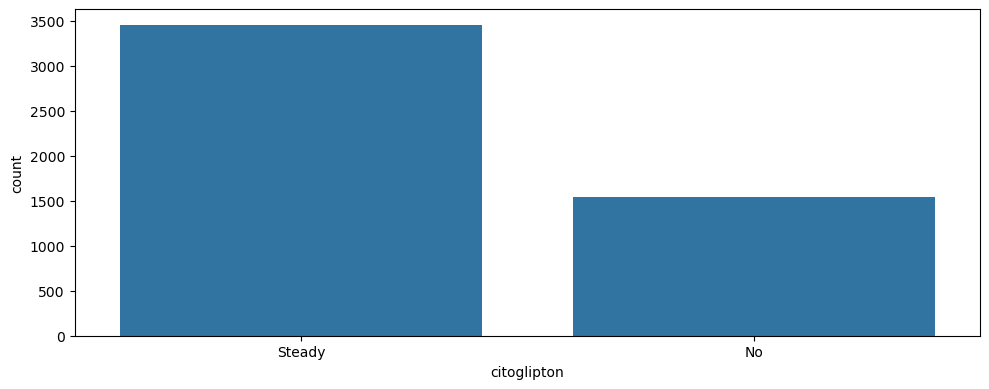

insulin
No        2329
Steady    1490
Down       591
Up         590
Name: count, dtype: int64


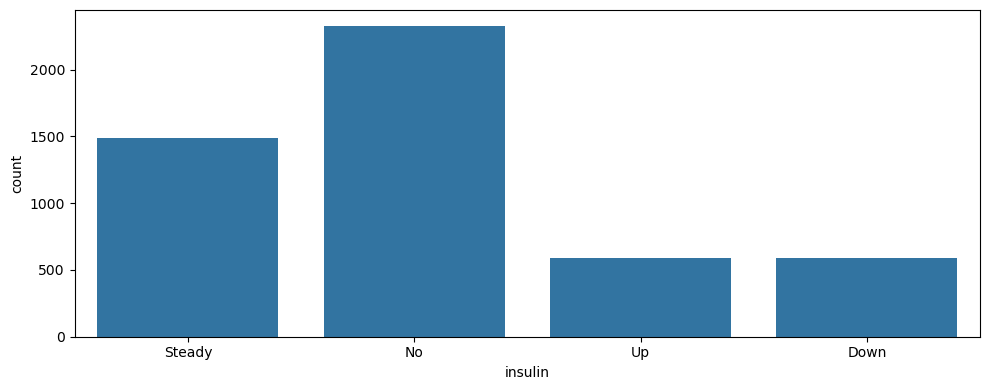

glyburide-metformin
No        4967
Steady      31
Down         1
Up           1
Name: count, dtype: int64


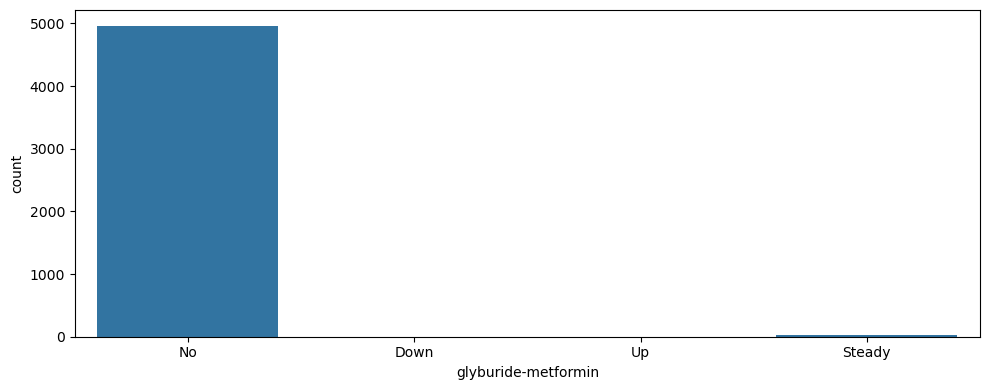

glipizide-metformin
No        4999
Steady       1
Name: count, dtype: int64


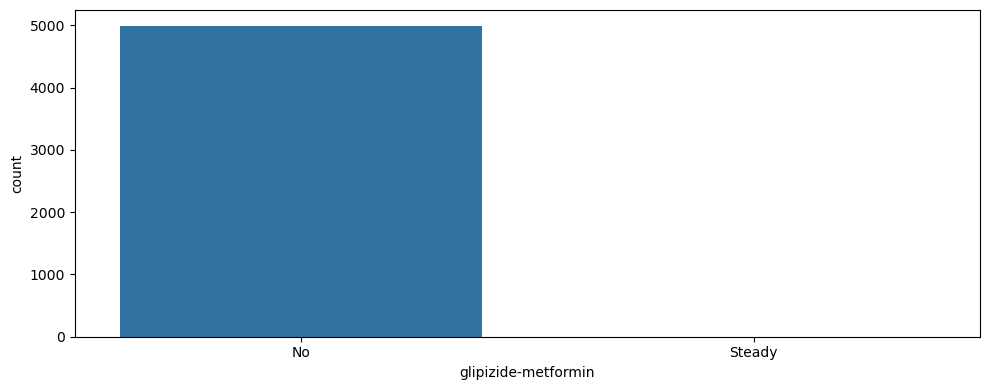

change
No    2692
Ch    2308
Name: count, dtype: int64


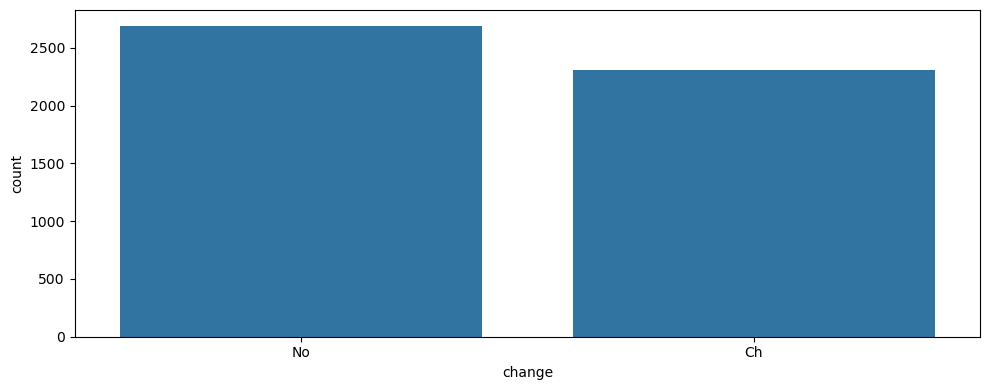

diabetesMed
Yes    3860
No     1140
Name: count, dtype: int64


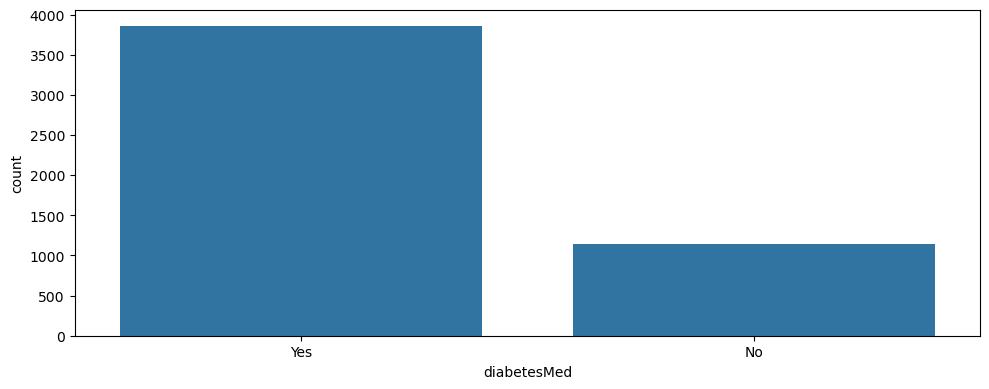

readmitted
NO     2718
YES    2282
Name: count, dtype: int64


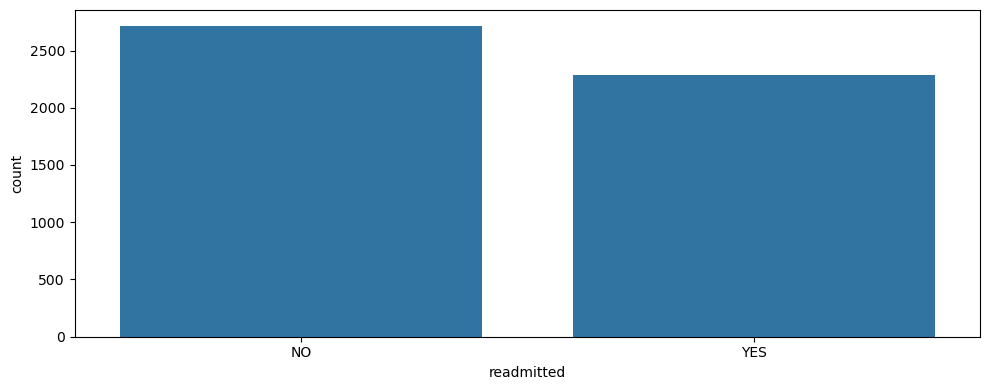

In [10]:
interesting_distribution_columns = [
    # 'patient_nbr', # Not relevant feature
    'race', 
    'gender', 
    'age', 
    'admission_type_id',
    'discharge_disposition_id', 
    'admission_source_id', 
    'time_in_hospital',
    'num_lab_procedures', 
    'num_procedures', 
    'num_medications',
    'number_outpatient', 
    'number_emergency', 
    'number_inpatient', 
    'diag_1', 
    'diag_2', 
    'diag_3', 
    # 'diag_4', # This is wrong
    'number_diagnoses', 
    'chlorpropamide',
    'glimepiride', 
    'glyburide', 
    'pioglitazone', 
    'rosiglitazone',
    'tolazamide', 
    'citoglipton', 
    'insulin', 
    'glyburide-metformin',
    'glipizide-metformin', 
    'change', 
    'diabetesMed', 
    'readmitted'
                                    ]

# First, we will check the distribution of the target variables. Since we
for column in data.columns: # Excluding the patient_nbr column
    print(data[column].value_counts(dropna=False))
    
    if column in interesting_distribution_columns: 
        plt.figure(figsize=(10, 4))
        sns.countplot(x=column, data=data)
        plt.tight_layout()
        plt.show()

Extractions:
- patient_nbr: There are repeated patients in the data. Only 4837 unique patients. Some patients have up to 3 entries.
- race: Caucasian (3759) > AfricanAmerican (923) > NaN (112) > Hispanic (95) > Other (72) > Asian (39). Maybe we could consider Caucasian, AfricanAmerican and Others merging the rest. 
- gender: Female (2701) > Male (2299). More or less balanced. 
- age: [70-80) (1241) > [60-70) (1168) > [80-90) (844) > [50-60) (832) > [40-50) (462) > [30-40) (183) > [90-100) (138) > [20-30) (85) > [10-20) (39) > [0-10) (8). Most of the patients are from 50-90. Maybe we could do some merging of the categories with lower frequency. 
- admission_type_id: urgency (3553) > elective (932) > unknown (515). Most of the admissions come from urgency. 
- discharge_disposition_id: home (3624) > hospital (1017) > unknown (231) > expired (81) > hospice (47). 
- admission_source_id: emergency (2871) > healthcare (1813) > unknown (316).
- time_in_hospital: 3 (861) > 2 (857) > 4 (686) > 1 (683) > 5 (485) > 6 (366) > 7 (281) > 8 (218) > 9 (164) > 10 (123) > 11 (91) > 12 (68) > 13 (65) > 14 (52)
- num_lab_procedures: Normal type with many outliers at 1, mean = 43.
- num_procedures: 0 (2253) > 1 (1027) > 2 (639) > 3 (471) > 6 (257) > 4 (223) > 5 (130). 
- num_medications: Normal type with mean 15.9. 
- number_outpatient, number_emergency, number_inpatient: Exponential type. With 0 dominating. 
- diag_1: circulatory (1524) > other (890) > respiratory (714) > digestive (468) > diabetes (436) > injury (326) > genitourinary (254) > musculoskeletal (225) > neoplasms (163)
- diag_2: circulatory (1618) > other (1264) > diabetes (586) > respiratory (526) > genitourinary (429) > digestive (205) > injury (162) > neoplasms (130) > musculoskeletal (80)
- diag_3: circulatory (1498) > other (1383) > diabetes (855) > respiratory (373) > genitourinary (363) > digestive (178) > injury (170) > musculoskeletal (105) > neoplasms (75)
- diag_4: 5000 values. All the other diag_x are around 360 values and are coded as first three digits of ICD9 while diag_4 has many decimal numbers which are not well defined in this context. Moreover, diag_4 does not appear in the original data set from the paper which appears to be a created feature.
- number_diagnoses: 9 (2398) > 5 (591) > 7 (536) > 6 (525) > 8 (485) > 4 (261) > 3 (147) > 2 (47) > 1 (5) > 16 (3) > 11 (1) > 13 (1)
- chlorpropamide: No (4997) > Steady (2) > Up (1)
- glimepiride: No (4738) > Steady (227) > Up (20) > Down (15)
- glyburide: No (4454) > Steady (486) > Up (35) > Down (25)
- pioglitazone: No (4653) > Steady (331) > Up (12) > Down (4)
- rosiglitazone: No (4679) > Steady (305) > Up (11) > Down (5)
- tolazamide: No (4999) > Steady (1)
- citoglipton: Steady (3457) > No (1543)
- insulin: No (2329) > Steady (1490) > Down (591) > Up (590)
- glyburide-metformin: No (4967) > Steady (31) > Down (1) = Up (1)
- glipizide-metformin: No (4999) > Steady (1)
- change: No (2692) > Ch (2308)
- diabetesMed: Yes (3860) > No (1140)
- readmitted: NO (2718) > YES (2282)

Conclusions:
- We have repeated patients in the data. In order to avoid data biases, we will remove the repeated patients. 
- We can remove diag_4.
- The two classes are more or less balanced, thus no Imbalanced Class Problem.
- We could redefine the categories where the distributions are with some values having very high frequency while others very low such as the "race", "age"...

In [11]:
data = data.drop('diag_4', axis=1) # Drop the redundant column

Now, let's explore the repeated data and see if we can find any patterns or if at least we can update some of the unknown values. 

In [12]:
# Let's see the repeated patients in the dataset
repeated_patients = data[data.duplicated(subset='patient_nbr', keep = False)].sort_values(by='patient_nbr') # duplicated patients sorted by patient_nbr

# Number of repeated patients
unique_repeated_patients = set(repeated_patients)
print(f"Number of (unique) repeated patients: {len(unique_repeated_patients)}")

# How many times are the patients repeated?
duplicate_counts = repeated_patients['patient_nbr'].value_counts()
print(f"Number of times the patients are repeated: {duplicate_counts.unique()}")

# Number of patients repeated only two times
repeated_two_times = duplicate_counts[duplicate_counts == 2]
print(f"Number of patients repeated only two times: {len(repeated_two_times)}")

# Number of patients repeated only three times
repeated_three_times = duplicate_counts[duplicate_counts == 3]
print(f"Number of patients repeated only three times: {len(repeated_three_times)}")

# print(len(repeated_patients)) # Why not 163? because here we are including the original patient as well
# print(f"Check: {2 * len(repeated_two_times) - len(repeated_two_times) + 3 * len(repeated_three_times) - len(repeated_three_times)}") # removing the original patients

Number of (unique) repeated patients: 31
Number of times the patients are repeated: [3 2]
Number of patients repeated only two times: 149
Number of patients repeated only three times: 7


In [13]:
# Patient 77620653 is duplicated and has the race value in one of the rows as 'Caucasian' at row 3390 while '?' at row 3713. Let's update the unknown row.
data.loc[3713, 'race'] = 'Caucasian' 
# data.loc[3713] # Check

The duplicates are 163 rows out of 5000 which is 3.2% of the rows. We eliminate the duplicates in order to avoid data biases.

In [14]:
data.drop_duplicates(subset='patient_nbr', keep='first', inplace=True) # Drop duplicates and keep the last record
data.drop('patient_nbr', axis=1, inplace=True)

We eliminate the 'expired' and 'hospice' patients as done in the original paper to avoid biasing the analysis. Note that the 'expired' patients will not be readmitted.

In [15]:
data = data[(data['discharge_disposition_id'] != 'expired') & (data['discharge_disposition_id'] != 'hospice')] # Drop the expired and hospice patients

Finally, given the race distribution, we merge the 'Hispanic' and 'Asian' categories into 'Other'.

In [16]:
data['race'] = data['race'].replace({
    'Hispanic': 'Other', 
    'Asian': 'Other'
    }) # Merge the 'Hispanic' and 'Asian' categories into 'Other'

Let's check how many missing values do we still have in the data.

In [17]:
data.isnull().sum() # Count missing values

race                        109
gender                        0
age                           0
admission_type_id           490
discharge_disposition_id    217
admission_source_id         294
time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                        0
diag_2                        0
diag_3                        0
number_diagnoses              0
chlorpropamide                0
glimepiride                   0
glyburide                     0
pioglitazone                  0
rosiglitazone                 0
tolazamide                    0
citoglipton                   0
insulin                       0
glyburide-metformin           0
glipizide-metformin           0
change                        0
diabetesMed                   0
readmitted                    0
dtype: int64

There are different ways to deal with the missing values. 
- We can remove the rows with missing values. Thereby also missing all the other information of the patient.
- We can input the missing values. An alternative for doing this is to calculate the probabilities of each of the possible values {Caucasian, AfricanAmerican, Hispanic, Asian, Other} and assign the missing values according to these probabilities.
- We can use a machine learning model to predict the missing values. This is a debatable approach. 

I will leave this task until the end so that I keep understanding the data as a whole. 

## Formatting the data

Let us now format the data so that we can use it for the machine learning models. In particular, we are going to convert the categorical features into numerical features.

The database, has already encoded some categorical features, we assume that it is properly done. Regarding the remaining categorical features, we have the three possible types Binary, Nominal and Ordinal. 

### Binary features

The binary features are the following {gender, admission_type_id, discharge_disposition_id, admission_source_id, change, diabetesMed, readmitted}. We will encode them as 0 (for negative) and 1 (affirmative).

In [18]:
# Binary Encoding
data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})
data['admission_type_id'] = data['admission_type_id'].replace({'elective': 0, 'urgency': 1})
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace({'home': 0, 'hospital': 1})
data['admission_source_id'] = data['admission_source_id'].replace({'healthcare': 0, 'emergency': 1})
data['change'] = data['change'].replace({'No': 0, 'Ch': 1})
data['diabetesMed'] = data['diabetesMed'].replace({'No': 0, 'Yes': 1})
data['readmitted'] = data['readmitted'].replace({'NO': 0, 'YES': 1})

/var/folders/gc/8k5tn1rd4s3_hgwyscn09j4w0000gn/T/ipykernel_13483/2329685419.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})
/var/folders/gc/8k5tn1rd4s3_hgwyscn09j4w0000gn/T/ipykernel_13483/2329685419.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['admission_type_id'] = data['admission_type_id'].replace({'elective': 0, 'urgency': 1})
/var/folders/gc/8k5tn1rd4s3_hgwyscn09j4w0000gn/T/ipykernel_13483/2329685419.py:4: FutureWarning: Downcasting behavior in 

### Ordinal features

The unique ordinal feature is the 'age' for which we define the following mapping: {[0-10): 0, [10-20): 1, [20-30): 2, [30-40): 3, [40-50): 4, [50-60): 5, [60-70): 6, [70-80): 7, [80-90): 8, [90-100): 9}.

In [19]:
# Ordinal Encoding
data['age'] = data['age'].replace({'[0-10)': 0.0, 
                                   '[10-20)': 0.1, 
                                   '[20-30)': 0.2, 
                                   '[30-40)': 0.3, 
                                   '[40-50)': 0.4, 
                                   '[50-60)': 0.5, 
                                   '[60-70)': 0.6, 
                                   '[70-80)': 0.7, 
                                   '[80-90)': 0.8, 
                                   '[90-100)': 0.9})

/var/folders/gc/8k5tn1rd4s3_hgwyscn09j4w0000gn/T/ipykernel_13483/2775186089.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['age'] = data['age'].replace({'[0-10)': 0.0,


### Nominal features

The nominal features are the 'race', diag_x for x $\in$ {1,2,3} and the medication features. We have to take care of the fact that the values are not ordinal. We could use one-hot encoding, but this would increase the number of features considerably. Therefore, we will be a little bit sloppy and encode the diag_x features numerically as well as the medication features giving some heuristic order.

In [20]:
# Nominal Encoding 
# Diagnosis columns
columns_to_replace = ['diag_1', 'diag_2', 'diag_3']
replacement_values = {"circulatory": 0.7, "digestive": 0.8, "genitourinary": 0.6, "diabetes": 1.0, "injury": 0.1, "musculoskeletal": 0.3, "neoplasms": 0.3, "respiratory": 0.4, "other": 0.5}
data[columns_to_replace] = data[columns_to_replace].replace(replacement_values) # The encoding is reflecting the relation to diabetes, from least (0.1) to most related (1.0)

# Medications columns
columns_to_replace = ['chlorpropamide', 'glimepiride', 'glyburide', 'pioglitazone', 'rosiglitazone', 'tolazamide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin']
replacement_values = {'No': 0.0, 'Down': 0.33, 'Steady': 0.66, 'Up': 1.0} # Although theoretically this encoding is ordinal, it has (arguably) some meaning in the context of the dataset. 

data[columns_to_replace] = data[columns_to_replace].replace(replacement_values)
data

/var/folders/gc/8k5tn1rd4s3_hgwyscn09j4w0000gn/T/ipykernel_13483/331399310.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_to_replace] = data[columns_to_replace].replace(replacement_values) # The encoding is reflecting the relation to diabetes, from least (0.1) to most related (1.0)
/var/folders/gc/8k5tn1rd4s3_hgwyscn09j4w0000gn/T/ipykernel_13483/331399310.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_to_replace] = data[columns_to_replace].replace(replacement_values)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,pioglitazone,rosiglitazone,tolazamide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
0,Caucasian,1,0.8,1.0,0.0,1.0,13,69,4,38,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,0,1,0
1,Caucasian,1,0.8,NaN,0.0,NaN,5,34,0,4,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,0,0,0
2,Other,0,0.6,1.0,1.0,0.0,1,37,1,13,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,0,1,0
3,Caucasian,0,0.4,1.0,0.0,1.0,4,56,2,22,...,0.00,0.0,0.0,0.66,1.00,0.0,0.0,1,1,1
4,Caucasian,1,0.7,1.0,0.0,1.0,1,38,2,1,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Caucasian,1,0.8,1.0,0.0,1.0,3,47,3,8,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,1,1,1
4996,Caucasian,0,0.7,1.0,0.0,0.0,8,52,0,17,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,1,1,1
4997,Caucasian,0,0.5,1.0,0.0,0.0,1,17,0,11,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,1,1,0
4998,Caucasian,0,0.7,1.0,0.0,1.0,2,42,6,12,...,0.66,0.0,0.0,0.00,0.00,0.0,0.0,0,1,1


## Dealing with the missing values

We are going to deal now with the missing values. We consider two main procedures: 
- Conservative (con): Remove the rows with missing values.
- Probabilistic (prob): Assign the missing values according to the probabilities of each of the possible values.

In [21]:
# Drop the rows with missing values
data_con = data.dropna()
data_con

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,pioglitazone,rosiglitazone,tolazamide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
0,Caucasian,1,0.8,1.0,0.0,1.0,13,69,4,38,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,0,1,0
2,Other,0,0.6,1.0,1.0,0.0,1,37,1,13,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,0,1,0
3,Caucasian,0,0.4,1.0,0.0,1.0,4,56,2,22,...,0.00,0.0,0.0,0.66,1.00,0.0,0.0,1,1,1
4,Caucasian,1,0.7,1.0,0.0,1.0,1,38,2,1,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,0,0,0
5,Other,1,0.8,1.0,0.0,0.0,2,61,0,8,...,0.00,0.0,0.0,0.00,0.33,0.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Caucasian,1,0.8,1.0,0.0,1.0,3,47,3,8,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,1,1,1
4996,Caucasian,0,0.7,1.0,0.0,0.0,8,52,0,17,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,1,1,1
4997,Caucasian,0,0.5,1.0,0.0,0.0,1,17,0,11,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,1,1,0
4998,Caucasian,0,0.7,1.0,0.0,1.0,2,42,6,12,...,0.66,0.0,0.0,0.00,0.00,0.0,0.0,0,1,1


In [22]:
# Race encoding
race_df = data_con[['race']]

# Generate one-hot encoded columns
encoded_race = pd.get_dummies(race_df, prefix='race', dtype=int)

position = data_con.columns.get_loc('race') # position where the original 'race' column was
data_without_race = data_con.drop('race', axis=1) # Drop the original

# Split the original DataFrame into two parts: before and after the 'race' column
data_before_race = data_without_race.iloc[:, :position]
data_after_race = data_without_race.iloc[:, position:]

# Concatenate everything back together, now including the one-hot encoded columns
data_con = pd.concat([data_before_race, encoded_race, data_after_race], axis=1)
data_con

,race_AfricanAmerican,race_Caucasian,race_Other,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,pioglitazone,rosiglitazone,tolazamide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
0,0,1,0,1,0.8,1.0,0.0,1.0,13,69,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,0,1,0
2,0,0,1,0,0.6,1.0,1.0,0.0,1,37,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,0,1,0
3,0,1,0,0,0.4,1.0,0.0,1.0,4,56,...,0.00,0.0,0.0,0.66,1.00,0.0,0.0,1,1,1
4,0,1,0,1,0.7,1.0,0.0,1.0,1,38,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,0,0,0
5,0,0,1,1,0.8,1.0,0.0,0.0,2,61,...,0.00,0.0,0.0,0.00,0.33,0.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,1,0.8,1.0,0.0,1.0,3,47,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,1,1,1
4996,0,1,0,0,0.7,1.0,0.0,0.0,8,52,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,1,1,1
4997,0,1,0,0,0.5,1.0,0.0,0.0,1,17,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,1,1,0
4998,0,1,0,0,0.7,1.0,0.0,1.0,2,42,...,0.66,0.0,0.0,0.00,0.00,0.0,0.0,0,1,1


In [23]:
data_prob = data.copy()

inputing_columns = ['race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']

for column in inputing_columns:
    # Calculate probabilities of each element in the column
    probabilities = data[column].value_counts(normalize=True)
    
    # Create a dictionary mapping each race value to its corresponding probability
    mapping = probabilities.to_dict()
    # print(mapping)

    # Iterate over the 'race' column and replace missing values with a random choice based on the probabilities
    data_prob[column] = data[column].apply(lambda x: np.random.choice(list(mapping.keys()), p=list(mapping.values())) if pd.isnull(x) else x)

data_prob.isnull().sum() # Check

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
chlorpropamide              0
glimepiride                 0
glyburide                   0
pioglitazone                0
rosiglitazone               0
tolazamide                  0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [24]:
# Race encoding
race_df = data_prob[['race']]

# Generate one-hot encoded columns
encoded_race = pd.get_dummies(race_df, prefix='race', dtype=int)

position = data_prob.columns.get_loc('race') # position where the original 'race' column was
data_without_race = data_prob.drop('race', axis=1) # Drop the original

# Split the original DataFrame into two parts: before and after the 'race' column
data_before_race = data_without_race.iloc[:, :position]
data_after_race = data_without_race.iloc[:, position:]

# Concatenate everything back together, now including the one-hot encoded columns
data_prob = pd.concat([data_before_race, encoded_race, data_after_race], axis=1)
data_prob

,race_AfricanAmerican,race_Caucasian,race_Other,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,pioglitazone,rosiglitazone,tolazamide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
0,0,1,0,1,0.8,1.0,0.0,1.0,13,69,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,0,1,0
1,0,1,0,1,0.8,0.0,0.0,0.0,5,34,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,0,0,0
2,0,0,1,0,0.6,1.0,1.0,0.0,1,37,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,0,1,0
3,0,1,0,0,0.4,1.0,0.0,1.0,4,56,...,0.00,0.0,0.0,0.66,1.00,0.0,0.0,1,1,1
4,0,1,0,1,0.7,1.0,0.0,1.0,1,38,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,1,0.8,1.0,0.0,1.0,3,47,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,1,1,1
4996,0,1,0,0,0.7,1.0,0.0,0.0,8,52,...,0.00,0.0,0.0,0.66,0.00,0.0,0.0,1,1,1
4997,0,1,0,0,0.5,1.0,0.0,0.0,1,17,...,0.00,0.0,0.0,0.66,0.66,0.0,0.0,1,1,0
4998,0,1,0,0,0.7,1.0,0.0,1.0,2,42,...,0.66,0.0,0.0,0.00,0.00,0.0,0.0,0,1,1


## Final Checks

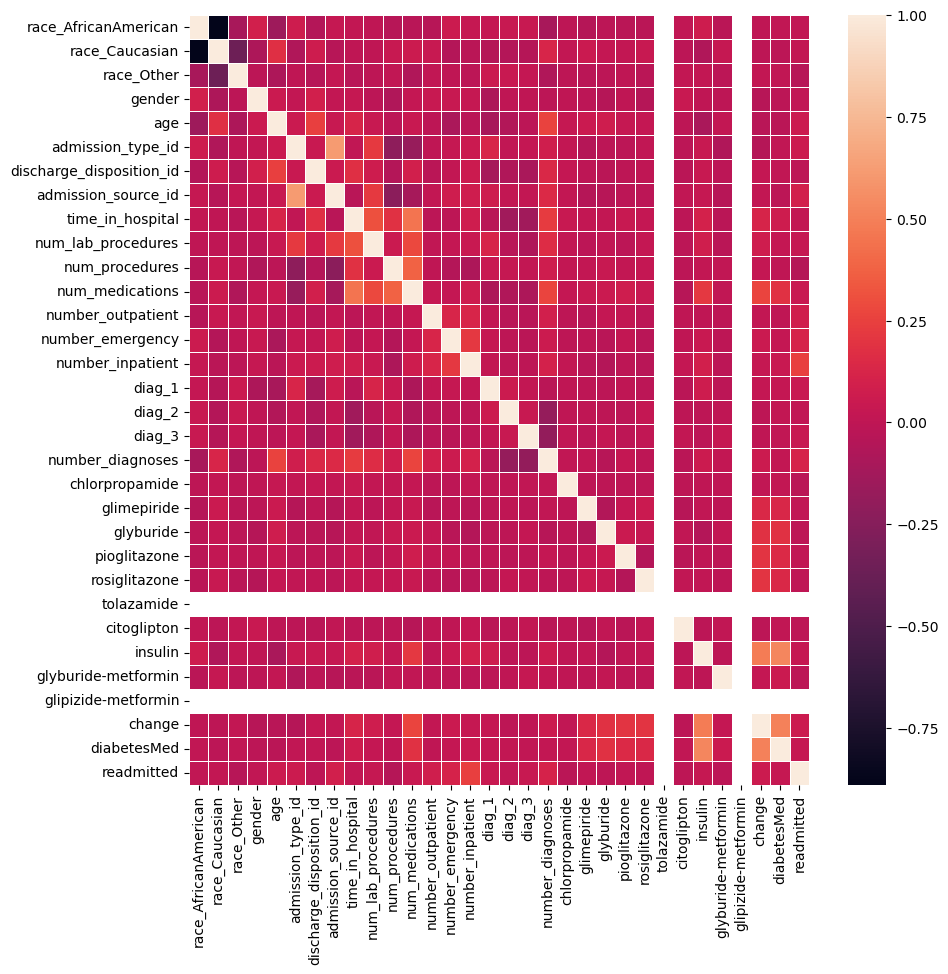

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))  # Increase the figure size as per your requirement
sns.heatmap(data_con.corr(), linewidths=0.7, ax=ax)
# sns.heatmap(data_prob.corr(), annot=True, fmt=".2f", square=True, linewidths=0.7, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

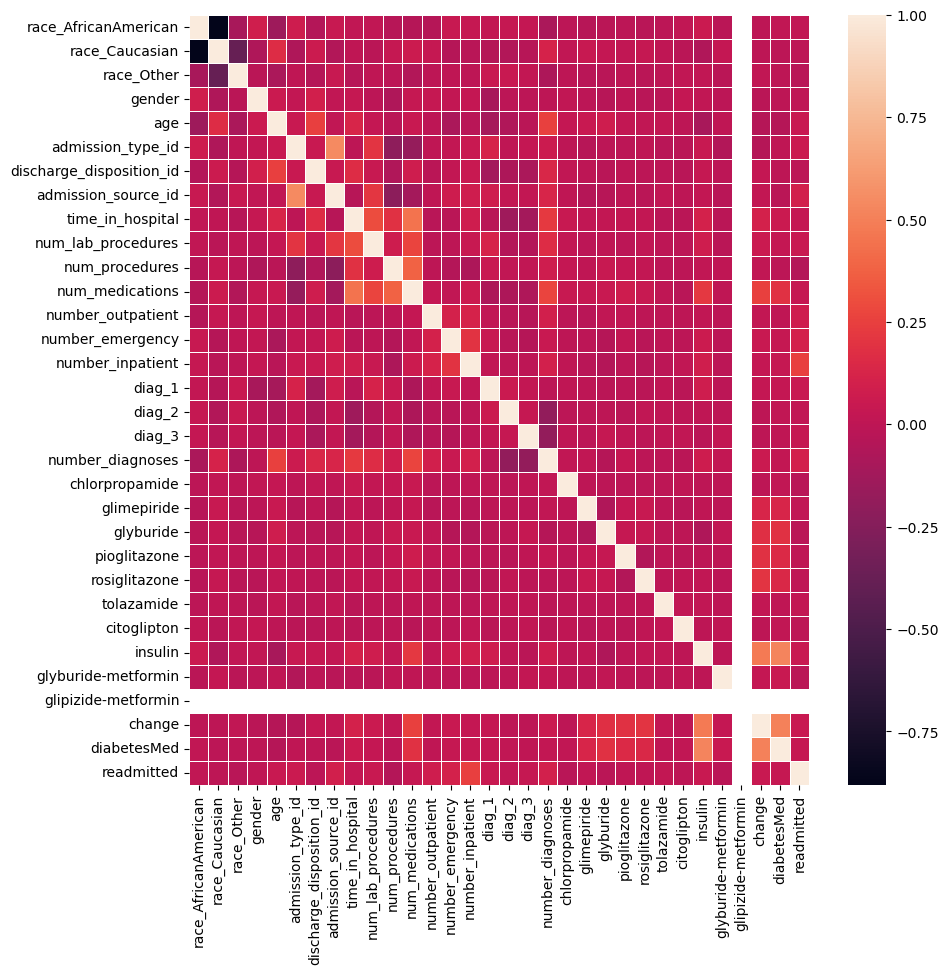

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))  # Increase the figure size as per your requirement
sns.heatmap(data_prob.corr(), linewidths=0.7, ax=ax)
# sns.heatmap(data_prob.corr(), annot=True, fmt=".2f", square=True, linewidths=0.7, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

## Save Final Data

Finally, we shuffle the data in order to avoid any biases in the data, and we save it in a csv file.

In [27]:
shuffled_data_con = shuffle(data_con); shuffled_data_con.to_csv('encoded_data_con.csv', index=False)
shuffled_data_prob = shuffle(data_prob); shuffled_data_prob.to_csv('encoded_data_prob.csv', index=False)

# Summary & Comments

The final data sets contain only numerical values and no missing data. The originally categorical features have been encoded; the binary features have been encoded as 0 and 1, the ordinal features have been encoded in a "natural" way and the 'race', as a nominal feature that did not have any sensible mapping to the numbers has been one-hot encoded.

In general, I have been very conservative (maybe even stupid) in regard to mantaining the data. I have removed only the absolutely redundant columns but:
- Almost redundant columns are still in the data set. I will study the feature importance in the models to decide if I should remove them.
- I have kept the repeated patients since they have different values in some of the features. 
- Regarding the 'race' feature, the pattern of unique values is: Caucasian (3759) > AfricanAmerican (923) > NaN (112) > Hispanic (95) > Other (72) > Asian (39). Maybe I could have merged some of the small categories and only one-hot encoded the most frequent ones and the merged ones, making the data set smaller. Nontheless, I have kept the data as it is for now.
Later when applying the machine learning models I will discuss the feature importance to optimize the classification, and only then I will remove more features. If I consider a model that require independence of the instances, I will remove the repeated patients.

Comment:
diabetesMed is redundant since it is determined by the medication features. But since there are many medications, I will keep it as for clarity for the machine learning models.